This notebook is part of the [Machine Learning class](https://github.com/erachelson/MLclass) by [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en).

License: CC-BY-SA-NC.

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Artificial Neural Networks</div>

1. [Biological neural networks](#sec1)
2. [Why invent artificial neural networks?](#sec2)
2. [Artificial neural networks](#sec3)
3. [Propagating values through a network](#sec4)
3. [Learning the weights of a neural network (regression case)](#sec5)
4. [Neural networks for classification](#sec6)

# 1. <a id="sec1"></a> Biological neural networks

In 1839, *Cell theory* introduces the idea that living bodies are made of cells.<br>
**Mikroskopische Untersuchungen über die Uebereinstimmung in der Struktur und dem Wachsthum der Thiere und Pflanzen.**<br>
Schwann, Theodor. Berlin: Sander. (1839).

But due to limitations in microsopy in the XIXth century, no one had observed the basic constituents of nerve tissue and the nervous system stood as an exception to cell theory.

In the first issue of the Revista Trimestral de Histología Normal y Patológica (May, 1888), Santiago Ramón y Cajal shows a physical separation between individual cells at the axon/dendrite connection (in chickens). This lays the basis of the **neuron doctrine** which lead to his 1906 Nobel prize for Physiology or Medecine.<br>
**Neuron theory, the cornerstone of neuroscience, on the centenary of the Nobel Prize award to Santiago Ramón y Cajal**.<br>
López-Muñoz, F., Boya, J., & Alamo, C. Brain research bulletin, 70(4-6), 391-405. (2006).

Neuron doctrine:
- neurons are the basis constituent of the nervous system
- dendrites $\rightarrow$ nucleus $\rightarrow$ axon $\rightarrow$ synapses (Law of Dynamic Polarization).
- electrical impulses.
- chemical neuro-transmitters.

<img src="img/neuron_bio.png" width="600px"></img>

# 2. <a id="sec2"></a> Why invent "artificial neural networks"?

Our rationale goes as follows.<br>
The human brain processes information efficiently, can we design an artificial computing method that mimics it?<br>
But computers process bits, so our artificial neurons should take logical values as inputs.

Let's take inspiration from the biological neuron for that and make a simplified model of a neuron. Suppose an input signal in the form of a binary vector $x$. The elements of $x$ can indicate binary statements which are true or false, such as "it's raining" or "I have an umbrella". We will model the *activation* of a neuron as:
$$f(x)=\left\{\begin{array}{ll} 0 & \textrm{if }w^T x+b\leq 0 \\ 1 & \textrm{otherwise}\end{array}\right.=step\left(w^Tx + b\right),$$
where $step$ is Heaviside's step function.

We will call such a function *Rosenblatt's Perceptron*.
Basically, a perceptron is a linear separation rule.
Intuitively, it is a machine that weights evidence $x$ and compares it to threshold $b$ in order to make a decision $f(x)$.

Although perceptrons were invented in the 50's and are not really representative of modern artificial neural networks, manipulating them conveys some of the important intuitions about artificial networks, so we will go into a "back to the future" mode for the next paragraphs before going any further.

<div class="alert alert-warning">
    
**Exercice: Back to the future, logical gates.** <br>
Take Rosenblatt's perceptron and find input weights that correspond to AND, OR and NAND gates (for two binary inputs).</div>

<div class="alert alert-danger"><a href="#answer1" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer1" class="collapse">

Rosenblatt's perceptron is the function $step(w_1 x_1 + w_2 x_2 +b)$. 

With $(w_1, w_2, b) = (2,2,-1)$ we get an OR gate. 

With $(w_1, w_2, b) = (2,2, -3)$ we get an AND gate. 

With $(w_1, w_2, b) = (-2,-2,3)$ we get a NAND gate.
</div>
</div>

In [1]:
import numpy as np

def perceptron(w,b,x):
    return np.heaviside(np.dot(x,w)+b,0)

x = np.zeros((4,2))
x[1,0] = 1.
x[2,1] = 1.
x[3,0] = 1.
x[3,1] = 1.

print("input values:\n", x)

def OR(x):
    w = np.array([2.,2.])
    b = -1.
    return perceptron(w,b,x)
print("testing OR gate:", OR(x))

def AND(x):
    w = np.array([2.,2.])
    b = -3.
    return perceptron(w,b,x)
print("testing AND gate:", AND(x))

def NAND(x):
    w = np.array([-2.,-2.])
    b = 3.
    return perceptron(w,b,x)
print("testing NAND gate:", NAND(x))

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
input values:
 [[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]]
testing OR gate: [0. 1. 1. 1.]
testing AND gate: [0. 0. 0. 1.]
testing NAND gate: [1. 1. 1. 0.]


<div class="alert alert-warning">
    
**Exercice: Back to the future, the XOR affair.** <br> 
Does it seem possible to describe a XOR gate with a perceptron? Building a XOR function can be seen as a classification problem; what is the family of classification problems that can be tackled by perpectrons (hint: recall the beginning of the SVM class)?</div>

<div class="alert alert-danger"><a href="#answer2" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer2" class="collapse">
    
No, it is actually not possible to model a XOR gate with a perceptron. Since perceptrons implement a threshold on a linear combination of the inputs, they can only separate (shatter, in VC theory) classes that are... linearly separable. XOR is a typical example of non-linearly separable data.
</div>
</div>

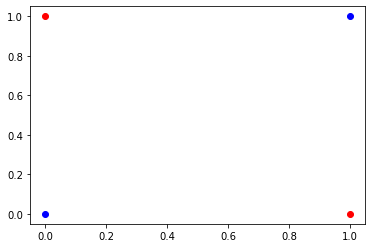

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter([0,1],[0,1],c='b')
plt.scatter([1,0],[0,1],c='r');

<div class="alert alert-success">
    
**Back to the future, networks of perceptrons.**<br> 
It is possible to connect perceptrons together to get a XOR function (for example by remarking that $x_1$ XOR $x_2$ = $(x_1$ OR $x_2)$ AND $(x_1$ NAND $x_2)$). It is actually possible to do so for any logical function. Such connected architectures are called Multi-Layer Perceptrons (MLP). This term was later used (abusively) for multi-layered networks of artifical neurons, regardless of their activation functions.</div>

<img src="./img/xor.png" width="600px"></img>

In [3]:
def XOR(x):
    y1 = OR(x)
    y2 = NAND(x)
    y = np.array([y1,y2]).T
    return AND(y)
print("input values:\n", x)
print("testing XOR gate:", XOR(x))

input values:
 [[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]]
testing XOR gate: [0. 1. 1. 0.]


As a consequence, any logical circuit can be represented as an MLP. **This seems a great ground for computer-based intelligence!**

Now the question is "how does one find (learn) the structure and weights of a neural network that seems intelligent?". We will come to that in a minute; let's first play around a bit with artificial neurons.

<div class="alert alert-warning">
    
**Exercice: Weight invariance of the Heaviside neuron.**<br>
If one multiplies all weights and the bias of a perceptron by a constant $c>0$, does the logical function change?</div>

<div class="alert alert-danger"><a href="#answer3" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer3" class="collapse">
    
A perceptron is invariant by scalar multiplication.
</div>
</div>

So far, we have considered a drastic "0 or 1" activation for a certain neuron. Suppose now that the input $x$ is not binary anymore: it is made of continuous variables, like a temperature, or a user preference. Then, when processing an input $x$, either the neuron's stimulation $w^Tx$ is above $-b$ or it is below. This makes the output of a neuron very sensitive to noise in the input, or to errors in setting the weights. Conversely, we could wish for a function that is *S-shaped* and that transitions smoothly from 0 to 1.

An example of such a function is the sigmoid function:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

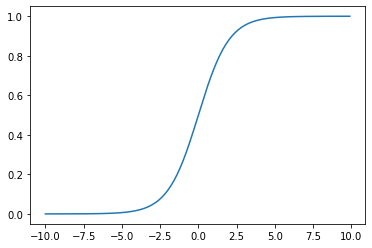

In [4]:
def sigmoid(x):
    return 1./(1. + np.exp(-x))

XX = np.arange(-10.,10.,0.1)
plt.plot(XX,sigmoid(XX));

<div class="alert alert-warning">
    
**Exercice: Weight invariance of the sigmoid neuron.**<br>
Explain why the weight invariance property does not hold for sigmoid activation functions? Can we regain this invariance property when $c\rightarrow\infty$?
</div>

<div class="alert alert-danger"><a href="#answer4" data-toggle="collapse"><b>Ready to see the answer? (click to expand)</b></a><br>
<div id="answer4" class="collapse">
    
This weight invariance property is not true for a sigmoid neuron because, for a given input $x$, multiplying all input weights by $c$ boils down to a shift by a multiplicative factor of $c$ on the horizontal scale of the sigmoid function above, which changes the value taken on the vertical axis. However, when $c\rightarrow\infty$, the sigmoid acts as a $step(w^Tx+b)$ function so tends to the same behavior as the perceptron.
</div>
</div>

<div class="alert alert-success">
    
**Beyond perceptrons.** Modern ANNs model logical functions as well as classification or regression tasks. For this purpose, one needs to find the correct weights so that the network actually produces the desired relation between inputs and outputs. Automatically tuning these weights from the data is the learning algorithm we need to design.
</div>

Note that the definition above restricts learning algorithms to finding optimized weights for a predefined set of neurons and connections. This is too reductive: finding the appropriate network structure is just as important. Unfortunately, Neural Architecture Search is still a pretty open research topic and, in this class, we will focus on weight learning for predefined network topologies.

So far, our progression of ideas has been:
- The human brain processes information efficiently, can we design an artificial computing method that mimics it?
- The biologicial neuron.
- Rosenblatt's perceptron: $f(x)=step(\sum w^T x+b)$ for a binary $x$ input vector.
- Networks of artificial neurons = Artifical Neural Networks (ANN).
- Generalization on activation functions and the particular case of the (logistic) sigmoid function.

If you get all the ideas behind each of these steps, we can move on to the next section.

# 3. <a id="sec3"></a>Artificial neural networks

**The idea:**
1. Each neuron processes a bit of information and passes it to its children.
2. Overall the network processes raw information into general concepts.

**Question:** can we mimic this system of connections in a learning system that adapts its parameters to the data it is exposed to?

<img src="img/neuron_bio.png" width="600px"></img>

**A formal neuron:**
$$z = \sigma(w^T x + b)$$
- $x$ is the input (the $n$-dimensional signal received through dendrites)
- $w$ is an $n$-dimensional vector of weights that give more or less importance to the elements of $x$
- $b$ is a scalar bias
- $\sigma$ is the neuron's activation function
- $z$ is the output (the signal along the "axon")

Note that the formal neuron is a *function*, very different from the impulses carried by axons in biological neurons.

<img src="img/artificial-neuron.png" width="250px">

**Computation graph**

A neural network is obtained by connecting some neuron's outputs to other neurons inputs. The goal of such a network is typically to learn how to imitate a certain function $f(x)$ for which we are given training data pairs $(x,y)$ with $y = f(x) + \textrm{noise}$. Such a network has thus three types of neurons:
- Input neurons. Those correspond to the different input variables $x_j$ describing our training examples.
- Output neurons. Those correspond to the targets $y$ in our examples.
- Hidden neurons. Any neurons that's not an input or an output neuron.

Therefore, a neural network is a computation graph, with inputs $x$ and outputs $y$, where nodes are neurons and edges connect the output signal of a node to one of the inputs of another.

**A little vocabulary:**
- A neural network is a computation graph.
- The input layer is composed of all input neurons.
- A layer is a (maximum) set of unconnected neurons, at the same depth from the input layer.
- The output layer is composed of all output neurons.
- All layers between the input and output layers are called hidden layers.
- A neural network organized in layers is called a feedforward NN.
- Some neural networks are not feedforward NNs and present loops. They are called Recurrent NN.
- A multilayer NN is often called a multilayer perceptron (for historical reasons)
- The output of a neuron is also called its activation.
- The vector of outputs for all neurons in a given layer is called the layer's activation.

<img src="img/nn.png" width="600px"></img>

**A bit of history:**<br>
1943: McCulloch (neurophysiologist) and Pitts (logician) suggest a first formal model for neurons.
> A logical calculus of the ideas immanent in nervous activity. McCulloch, W. and Pitts, W. Bulletin of Mathematical Biophysics, 5:115–133. (1943). [paper](https://link.springer.com/article/10.1007%2FBF02478259), [wikipedia](https://en.wikipedia.org/wiki/Artificial_neuron).

1949: Hebb suggests dendrites are strengthened whenever they are used.
> The Organization of Behavior. Hebb, D.O. New York: Wiley & Sons. (1949). [book](), [wikipedia](https://en.wikipedia.org/wiki/Hebbian_theory).

1951: [Minsky](https://en.wikipedia.org/wiki/Marvin_Minsky) designs a network of artificial neurons.
> [wikipedia](https://en.wikipedia.org/wiki/Stochastic_neural_analog_reinforcement_calculator)

1958: Roseblatt designs the Perceptron, with step activation functions.
> The perceptron: A probabilistic model for information storage and organization in the brain. Rosenblatt, F. Psychological Review, 65(6), 386-408. (1958) [wikipedia](https://en.wikipedia.org/wiki/Perceptron). [paper](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.588.3775)

1962: Widrow and Hoff suggest the delta-rule for adapting a network weights to obtain the desired output.
> [wikipedia](https://en.wikipedia.org/wiki/Least_mean_squares_filter)

1970s and 80s: The "quiet years", first AI winter. Attention turns to other methods while computing resources slowly increase. The Lighthill report halts AI research in the UK.
> Artificial Intelligence: A General Survey. James Lighthill. Artificial Intelligence: a paper symposium, UK Science Research Council. (1973).

1986: Rediscovery of the backpropagation algorithm (for multilayered perceptrons).
> Learning representations by back-propagating errors. Rumelhart, David E.; Hinton, Geoffrey E.; Williams, Ronald J. Nature. 323 (6088): 533–536. 1986. [paper](https://www.nature.com/articles/323533a0).

1990s: not enough computing power, not enough data, not enough recognition (while other methods like SVMs achieve good results). Second AI winter.

2000s: computing power + available data allow the training of deep multi-layered architectures (deep learning). Massive successes.

<div class="alert alert alert-success"> Feedforward neural networks are computational graphs where edges convey scalar values between neurons (nodes).<br>
A neuron's output results from the application of the activation function $\sigma$ to a linear combination of its inputs $z = \sigma(w^T x + b)$.<br>
The network parameters are all the neuron's input weights and biases. <br>
A neural network is a function that transforms its inputs into outputs by value propagation in the network.<br>
Learning a neural network consists in finding the $w$ and $b$ such that the network's output matches the function $f(x)$ that generated the data pairs $(x,y = f(x)\textrm{+noise})$.
</div>

**Universal approximation theorem:**<br>
If $\sigma$ is "S-shaped", then with enough neurons, a single layer, feed-forward NN can approximate any continuous function to an arbitrary precision.<br>
In other words, NN are universal approximators.<br>
<a href="UniversalApproximationTheorem.pdf">Let's take a formal look at this theorem.</a>

**Activation functions**
- step
$$\sigma(x) = 0 \textrm{ if }x\leq0\textrm{, }1\textrm{ otherwise}$$
- linear
$$\sigma(x) = x$$
- sigmoid or logistic (which we will consider by default for now)
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
- hyperbolic tangent
$$\sigma(x) = \frac{e^{x} + e^{-x}}{e^{x} - e^{-x}}$$
- radial basis function (useful in some specific cases like Kohonen maps)
$$\sigma(x) = e^{-x^2}$$

# <a id="sec4"></a>4. Propagating values through a network

Let's define a neural network that has the following structure:
- 2 input neurons
- first hidden layer with 4 sigmoid neurons
- second hidden layer with 3 sigmoid neurons
- one ouput layer with an identity neuron

<img src="img/nn2.png" width="600px"></img>

Let's initialize its weights randomly (following a $\mathcal{N}(0,1)$ distribution).

In [5]:
sizes = [2,4,3,1]
num_layers = len(sizes)
biases = [np.random.randn(1,y) for y in sizes[1:]]
weights = [np.random.randn(out,inp) for inp,out in zip(sizes[:-1],sizes[1:])]

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

<div class="alert alert-warning">
    
**Exercice:**<br>
Write a function that computes the forward propagation of the input $x=[1,2]$ through the network and returns the outputs and all intermediate activations.
</div>

In [8]:
# %load solutions/code1.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

input_value = np.array([[1,2]])

def forward_pass(x, verbose=False):
    z = [np.zeros((x.shape[0], sz)) for sz in sizes]
    y = [np.zeros((x.shape[0], sz)) for sz in sizes]
    z[0] = x.copy()
    for i in range(1,len(sizes)):
        if verbose:
            print("# Forward propagation to layer", i)
        y[i] = np.dot(z[i-1],weights[i-1].T) + biases[i-1]
        if verbose:
            print("Neuron inputs:", y[i])
        if i==len(sizes)-1:
            z[i] = y[i]
        else:
            z[i] = sigmoid(y[i])
        if verbose:
            print("Layer outputs:", z[i])
    return y,z

y,z = forward_pass(input_value, verbose=True)


# Forward propagation to layer 1
Neuron inputs: [[-1.15109824 -0.60708946  1.21022692  3.26107916]]
Layer outputs: [[0.24028854 0.35272342 0.7703391  0.96306919]]
# Forward propagation to layer 2
Neuron inputs: [[-3.29704684  1.05988761 -0.47196802]]
Layer outputs: [[0.03567264 0.74266907 0.38415054]]
# Forward propagation to layer 3
Neuron inputs: [[-2.0986636]]
Layer outputs: [[-2.0986636]]


# 5. <a id="sec5"></a> Learning the weights of a neural network (regression case)

Suppose that the value associated to $x=[1,2]$ in the previous example was $12.3$. That is not what was predicted and we could wish to adapt the weights of the network so that the next time we propagate $x=[1,2]$ through the network, the prediction is closer to $12.3$.

Let's do a bit of math to formalize the search for the best neural network for our data.

Let's first suppose that our data points $(x,y)$ are drawn from a probability distribution $p(x,y)$.

## 5.1 Loss function

After all, a neural network with a fixed graph structure is a parametric function $f_\theta$ where $\theta$ is the vector of all parameters (all weights and biases). Learning a neural network that correctly predicts $y$ corresponds to finding the parameters $\theta$ that minimize the following function.
$$L(\theta) = \displaystyle \mathbb{E}_{(x,y)\sim p(x,y)} \left[ \left(f_\theta(x) - y\right)^2 \right] = \int_{x,y} \left[ \left(f_\theta(x) - y\right)^2 \right] \mathrm{d}p(x,y) $$

This is what we shall call the *loss function*. The smaller $L(\theta)$, the happier we are.

Note that we have defined $L(\theta)$ as a least squares minimization problem and that other loss functions could be relevant for certain problems.

<div class="alert alert-warning">
    
**Exercice:**<br>
Using the training data provided below, estimate the loss function for the current parameters $\theta$ of the network defined in the previous section.
</div>

In [9]:
input_X = np.array([[1.,2.],[1.1,1.7],[0.8,1.9]])
def func(x):
    return np.sqrt(x[:,0]+x[:,1])
output_y = func(input_X)

In [11]:
# %load solutions/code2.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

ypred,zpred = forward_pass(input_X, verbose=True)
pred = zpred[-1]
err = np.mean((pred-output_y)**2)
print("Loss function estimate:",err)

# Forward propagation to layer 1
Neuron inputs: [[-1.15109824 -0.60708946  1.21022692  3.26107916]
 [-0.73677855 -0.77823813  0.79478483  2.9238173 ]
 [-1.19445881 -0.26606641  1.47086767  3.00690402]]
Layer outputs: [[0.24028854 0.35272342 0.7703391  0.96306919]
 [0.32370899 0.31469973 0.6888578  0.94901133]
 [0.23246243 0.43387304 0.81318923 0.95288505]]
# Forward propagation to layer 2
Neuron inputs: [[-3.29704684  1.05988761 -0.47196802]
 [-3.05369141  0.92262199 -0.3016284 ]
 [-3.38142373  1.10216585 -0.56938122]]
Layer outputs: [[0.03567264 0.74266907 0.38415054]
 [0.04505837 0.71557605 0.42515945]
 [0.03288109 0.7506657  0.36137962]]
# Forward propagation to layer 3
Neuron inputs: [[-2.0986636 ]
 [-2.12832449]
 [-2.07744202]]
Layer outputs: [[-2.0986636 ]
 [-2.12832449]
 [-2.07744202]]
Loss function estimate: 14.322897212297274


## 5.2 Stochastic gradient descent

Let's say we have an initial guess $\theta_0$ for the parameters of $f_\theta$. How can we change this guess so that we minimize $L(\theta)$? Plain gradient descent tells us we should move in the opposite direction of the gradient of $L(\theta)$ with respect to $\theta$. So let's write this gradient:

\begin{align*}
\displaystyle \nabla_\theta L(\theta) &= \nabla_\theta \left[ \mathbb{E}_{(x,y)\sim p(x,y)} \left[ \left(f_\theta(x) - y\right)^2 \right] \right]\\
&= \mathbb{E}_{(x,y)\sim p(x,y)} \left[ \nabla_\theta \left[ \left(f_\theta(x) - y\right)^2 \right] \right]\\
&= \mathbb{E}_{(x,y)\sim p(x,y)} \left[ 2 \left(f_\theta(x) - y\right) \nabla_\theta f_\theta(x) \right]
\end{align*}

So, the gradient of $L(\theta)$ is the expectation of $2 \left(f_\theta(x) - y\right) \nabla_\theta f_\theta(x)$. In other words:

$$\nabla_\theta L(\theta) = \int_{x,y} 2 \left(f_\theta(x) - y\right) \nabla_\theta f_\theta(x) \mathrm{d}p(x,y)$$

The problem with this expression is that it requires the knowledge of $p(x,y)$ for all possible $(x,y)$ pairs. That would mean having an infinite amount of data. We can, however, try to approximate this gradient with a finite data set $\left\{\left(x_i,y_i\right)\right\}_{i\in [1,N]}$:
$$\nabla_\theta L(\theta) \approx \sum_{i=1}^N 2 \left(f_\theta(x_i) - y_i\right) \nabla_\theta f_\theta(x_i)$$

This is actually a *noisy estimation of the gradient* (that converges to the true gradient in the limit of infinite sampling). The theory of *stochastic gradient descent* tells us that if $g(\theta)$ is a noisy estimator of $\nabla_\theta L(\theta)$, then the following sequence $\theta_k$ converges to a local minimum of $L(\theta)$:
$$\theta_{k+1} = \theta_k - \alpha_k g(\theta_k)$$
under the condition that $\sum \alpha_k = \infty$ and $\sum \alpha_k^2 < \infty$ (called the Robbins-Monro conditions).

**A Stochastic Approximation Method**.
H. Robbins and S. Monro (1951). *The Annals of Mathematical Statistics*. **22**(3): 400. 

The first condition $\sum \alpha_k = \infty$ insures that whatever the starting parameters $\theta_0$, no matter how far from $\theta_0$ the minimum is, this procedure can reach it.

The second condition $\sum \alpha_k^2 < \infty$ forces the step sizes to be a decreasing sequence and avoids oscillations around the minimum.

Here we have
$$g(\theta) = \sum_{i=1}^N 2 \left(f_\theta(x_i) - y_i\right) \nabla_\theta f_\theta(x_i).$$

To simplify the notation we shall write $\alpha$ instead of $\alpha_k$.

One complete pass (to compute the $\sum_{i=1}^N$) over the training set will be called a *training epoch*.

## 5.3 Minibatches

Notation disambiguation: $\theta_k$ refers to the $k$th parameter vector in the sequence above, $\theta_j$ refers to the $j$th component of vector $\theta$.

Now we have a procedure that allows to find some optimal weights for our network. Provided that, for all parameter $\theta_j$ in the parameter vector $\theta$, we can compute $\frac{\partial f_\theta}{\partial \theta_j}(x)$, then we can calculate:
$$g_{j}(\theta) = \sum_{i=1}^N 2 \left(f_{\theta}(x_i) - y_i\right) \frac{\partial f_{\theta}}{\partial\theta_j}(x_i)$$
And thus we can update $\theta_j$ with:
$$\theta_j \leftarrow \theta_j - \alpha g_{j}(\theta)$$

So the computation of all the components in $g(\theta)$ and the update of each element in $\theta$ can be done in *parallel*.

It appears, however, that for large datasets, summing over the $N$ elements is computationally expensive. So we could define a cheaper (but noiser) version of the gradient by summing only over a random subset of $n$ training points ($n \ll N$): 
$$\nabla_\theta L(\theta) \approx g(\theta) = \sum_{i=1}^n 2 \left(f_\theta(x_i) - y_i\right) \nabla_\theta f_\theta(x_i) $$

Such a subset is called a *minibatch*. When $n=1$, the gradient estimate is based on a single example and is thus very (very!) noisy and convergence can be very slow and unstable. When $n\rightarrow N$ the noise level decreases at the expense of a heavier computational cost. In practice, the noise level decreases quickly enough that we can take $n\in [50;1000]$ in most cases.

## 5.4 Recursive gradient computation

For the update above to be feasible, we need to have a differentiable $f_\theta$. Let's take a close look at the gradient $\nabla_\theta f_\theta(x)$ and write it as:
\begin{align*}
\nabla_\theta f_\theta(x) &= \left[ \begin{array}{c} \vdots \\ \frac{\partial f_\theta}{\partial\theta_j}(x) \\ \vdots \end{array}\right]
\end{align*}

In the case of a neural network, the $\theta_j$ are weights and biases. Let's consider neuron number $j$ and let's write $w_{ij}$ its input weights (with the convention that $i=0$ corresponds to the bias). We will write:
- $x_{ij}$ the $i$th input to this neuron
- $y_j = \sum_i w_{ij} x_{ij}$ the scalar input to the activation function
- $z_j = \sigma (y_j)$ the neuron's output
<img src="attachment:neuronj-0.png" width="300px"></img>

These three quantities have been computed during the *forward pass*, when $x$ was propagated through the network to obtain $f_\theta(x)$.

<div class="alert alert-warning">
    
**Exercice:**<br>
Use the chain rule to write $\frac{\partial f_\theta}{\partial w_{ij}}(x)$ as an expression of the partial derivatives of $f_\theta$ with respect to $z_j$ and $y_j$. Simplify this expression.
</div>

Using the chain rule, we can write:
$$\frac{\partial f_\theta}{\partial w_{ij}}(x) = \frac{\partial f_\theta}{\partial z_j}(x) \frac{\partial z_j}{\partial y_j}(x) \frac{\partial y_j}{\partial w_{ij}}(x).$$

Let's decompose this expression. First we take the last (third) term. We have $y_j = \sum_i w_{ij} x_{ij}$, so:
$$\frac{\partial y_j}{\partial w_{ij}}(x) = x_{ij}.$$

Then we take the second term. We have $z_j = \sigma(y_j)$, so:
$$\frac{\partial z_j}{\partial y_j}(x) = \sigma'(y_j).$$

And so:
$$\boxed{\frac{\partial f_\theta}{\partial w_{ij}}(x) = \frac{\partial f_\theta}{\partial z_j}(x) \sigma'(y_j) x_{ij}}.$$

Only the first term remains to be calculated in the expression above.
<div class="alert alert-warning">
    
**Exercice:**<br>
Suppose that $j$ is an output neuron. What is $\frac{\partial f_\theta}{\partial z_j}(x)$? And consequently, what is the value of $\frac{\partial f_\theta}{\partial w_{ij}}(x)$?
</div>

Let's assume $j$ is an output neuron. In this case, $z_j$ is the $j$th component of $f_\theta(x)$, and we have:
$$\frac{\partial f_\theta}{\partial z_j}(x) = 1.$$

Consequently, for the neurons of the output layer:
$$\boxed{\frac{\partial f_\theta}{\partial w_{ij}}(x) = \sigma'(y_j) x_{ij}}.$$

And hence, the update of the input weights $w_{ij}$ for output neuron $j$ (in the output layer) is:
$$w_{ij} \leftarrow w_{ij} - \alpha \left(f_\theta(x) - y\right)\sigma'(y_j) x_{ij}$$
Note that, in the expression above, $y$ is the value associated to $x$ (not to be confused with pre-neuron value $y_j$).

Now let's look at the neurons of the layer just preceding the output layer. Let's call $L_j$ the set of indices of the neurons that directly feed on neuron $j$'s output. $z_j$ corresponds to the $x_{jl}$ variable for these neurons and $y_l$ is the scalar input to neuron $l$. 

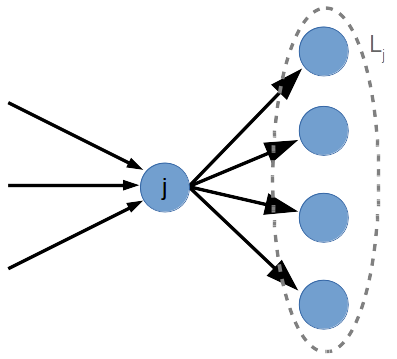</img>

<div class="alert alert-warning">
    
**Exercice:**<br>
Remark that $x_{jl}=z_j$. Take the total derivative of $f_\theta$ and derive a recurrence relation between $\frac{\partial f_\theta}{\partial z_j}(x)$ and the $\frac{\partial f_\theta}{\partial z_l}(x)$.
</div>

We can take the total derivative:
$$\frac{\partial f_\theta}{\partial z_j}(x) = \sum_{l \in L_j} \frac{\partial f_\theta}{\partial y_l}(x) \frac{\partial y_l}{\partial z_j}(x).$$

And so, we can write:
$$\frac{\partial f_\theta}{\partial z_j}(x) = \sum_{l \in L_j} \frac{\partial f_\theta}{\partial z_l}(x) \frac{\partial z_l}{\partial y_l}(x) \frac{\partial y_l}{\partial z_j}(x).$$

As previously:
$$\frac{\partial z_l}{\partial y_l}(x) = \sigma'(y_l)\textrm{ and }\frac{\partial y_l}{\partial z_j}(x) = w_{jl}$$

So this total derivative turns into:
$$\boxed{\frac{\partial f_\theta}{\partial z_j}(x) = \sum_{l \in L_j} \frac{\partial f_\theta}{\partial z_l}(x) \sigma'(y_l) w_{jl}}.$$

This provides a recurrence relation between $\displaystyle \frac{\partial f_\theta}{\partial z_j}(x)$ and $\displaystyle \frac{\partial f_\theta}{\partial z_l}(x)$ for $l \in L_j$.

Let's write $\boxed{\displaystyle  \delta_j = \frac{\partial f_\theta}{\partial z_j}(x) \sigma'(y_j)}$. Recall that our goal is to evaluate:
$$\frac{\partial f_\theta}{\partial w_{ij}}(x) = \frac{\partial f_\theta}{\partial z_j}(x) \frac{\partial z_j}{\partial y_j}(x) \frac{\partial y_j}{\partial w_{ij}}(x) = \frac{\partial f_\theta}{\partial z_j}(x) \sigma'(y_j) x_{ij} = \delta_j x_{ij},$$
$$\boxed{\frac{\partial f_\theta}{\partial w_{ij}}(x) = \delta_j x_{ij}}.$$

And we have the following recurrence equation between neuron $j$ and its siblings in $L_j$:
$$\delta_j = \sigma'(y_j)\sum_{l\in L_j} \delta_l w_{jl}$$

And, in particular, for output neurons:
$$\delta_j = \frac{\partial f_\theta}{\partial z_j}(x) \sigma'(y_j) = \sigma'(y_j)$$

In short:
$$\boxed{\delta_j = \left\{\begin{array}{ll}
\sigma'(y_j) & \textrm{for output neurons,}\\
\sigma'(y_j)\sum_{l\in L_j} \delta_l w_{jl} & \textrm{for other neurons.}
\end{array}\right.}$$

## 5.5 Backpropagation

Let's summarize. The key to backpropagation is to remark that in all cases:
$$\frac{\partial f_\theta}{\partial w_{ij}}(x) = \delta_j x_{ij}.$$

With 
$$\delta_j = \frac{\partial f_\theta}{\partial z_j}(x) \sigma'(y_j).$$

If neuron $j$ is an output neuron, then $z_j$ is the $j$th component of $f_\theta(x)$. So $ \frac{\partial f_\theta}{\partial z_j}(x) = 1$. Consequently, for those neurons:
$$\delta_j = \frac{\partial f_\theta}{\partial z_j}(x) \sigma'(y_j) = \sigma'(y_j).$$

Recursively, once all the $\delta_j$ for the output layer have been computed, we can compute the $\delta_j$ for the last hidden layer as:
$$\delta_j = \sigma'(y_j) \sum_{l\in L_j} \delta_l w_{jl}.$$

And the input weights of neuron $j$ can be updated as:
$$w_{ij} \leftarrow w_{ij} - \alpha \left(f_\theta(x) - y\right) \delta_j x_{ij}.$$

Once, all these weights have been updated and all the $\delta_j$ have been computed for the corresponding neurons, we can move one layer back in the network, and so on until we reach the input layer.

This algorithm is called *Backpropagation* of the gradient.

<div class="alert alert-success">
The backpropagation algorithm allows to update the networks weights.<br>

**Forward pass:**
<ol style="list-style-type:none">
<li> Input $x$
<li> $\lambda=$input layer
<li> While $\lambda\neq$ output layer:
    <ol style="list-style-type:none">
    <li>For $j$ in $\lambda$:
        <ol  style="list-style-type:none"><li>Compute $y_j=\sum w_{ij} x_{ij}$ and $z_j=\sigma(y_j)$</ol>
    <li> $\lambda \leftarrow$ next layer
    <li> $x \leftarrow z$
    </ol>
<li> Output $f_\theta(x)$
</ol>

**Backpropagation:**
<ol style="list-style-type:none">
<li> Output difference $\Delta = f_\theta(x) - y$
<li> For $j$ in output layer $\delta_j = \sigma'(y_j)$
<li> $\lambda =$ output layer
<li> While layer $\lambda \neq$ input layer:
    <ol style="list-style-type:none">
    <li> For $j$ in $\lambda$:
        <ol style="list-style-type:none">
        <li>Compute $\delta_j = \sigma'(y_j) \sum_{l\in L} \delta_l w_{jl}$ (only if not output layer)
        <li>Update $w_{ij} \leftarrow w_{ij} - \alpha \Delta \delta_j x_{ij}$</ol>
    <li> $\lambda=$previous layer
    </ol>
</ol>
</div>

A number of things can be remarked to make this computation more streamlined and efficient.

1. $\sigma'(x)=\sigma(x)\left(1-\sigma(x)\right)$ so one can get $\sigma'$ for free during the forward pass and store it.
2. all operations of the backward pass can be written in matrix form (just as for the forward pass).
3. in the notations above, $x_{0j}=1$ since it is the term that will be multiplied by the bias.
4. for a given $j$, all $x_{ij}$ in the notations above are really the $z$ value of the layer before neuron $j$.

One can easily rewrite the forward pass and the backpropagation as matrix/vector operations.<br>
Let $\lambda$ be the layer number, starting at 0 for the input layer.<br>
Let $w_{\lambda-1}$ denote the $p\times q$ weight matrix before layer $\lambda$ where $p$ is the size of layer $\lambda$ and $q$ is the size of layer $\lambda-1$ (plus one for the biases).<br>
Finally, let $\circ$ denote the element-wise product (Hadamard product) of two matrices.

<div class="alert alert-success">

**Forward pass:**
<ol style="list-style-type:none">
<li> Input $x$
<li> $\lambda=1$
<li> While $\lambda\neq$ output layer index:
    <ol style="list-style-type:none">
    <li> Compute $y_\lambda = w_{\lambda-1}^T x$, 
    <li> Compute $z_\lambda = \sigma (y_\lambda)$ and $s_\lambda = \sigma'(y_\lambda)$
    <li> $\lambda \leftarrow \lambda+1$
    <li> $x \leftarrow z_\lambda$
    </ol>
<li> Output $f_\theta(x)$
</ol>

**Backpropagation:**
<ol style="list-style-type:none">
<li> Output difference $\Delta = f_\theta(x) - y$
<li> $\lambda=$ output layer index
<li> $\delta_\lambda = s_\lambda$
<li> $w_{\lambda-1} \leftarrow w_{\lambda-1} - \alpha \Delta (\delta_\lambda \cdot z_{\lambda-1}^T)$
<li> $\lambda\leftarrow \lambda -1$
<li> While $\lambda \neq 0$:
    <ol style="list-style-type:none">
    <li> $\delta_\lambda = s_\lambda \circ (\delta_{\lambda+1}\cdot w_\lambda)$
    <li> $w_{\lambda-1} \leftarrow w_{\lambda-1} - \alpha \Delta (\delta_\lambda \cdot z_{\lambda-1}^T)$
    <li> $\lambda\leftarrow \lambda -1$
    </ol>
</ol>
</div>

Note that backpropagation is a very general principle for propagating gradients in a computational graph. Any activation function can be substituted in the expressions above, and a very similar derivation can be obtained for other loss functions (more on this later).

# 5.6 Backpropagation in practice

<div class="alert alert-warning">
    
**Exercice (collective):**<br>
Write a backpropagation pass for the minibatch containing the triplet $(x=(1,2),y=12.3)$, $(x=(3,1),y=3.4)$ and $(x=(2,5),y=5.1)$ on the network defined before.
</div>

To help fix ideas, the picture below summarizes all the data structures used.
<img src="img/nn3.png" width="600px"></img>

- in red, the network's data: w[i] and b[i] store the weights and biases,
- in blue, what is computed during the forward pass, y[i] for $w^x$, s[i] for $\sigma'(x)$, z[i] for neuron activations,
- in green, what is computed during the backward pass, $\delta$[i] and the weights and biases updates.

In [12]:
def sigmoid(z):
    """The sigmoid function."""
    val = 1.0/(1.0+np.exp(-z))
    der = val*(1.-val)
    return val, der

def forward_pass(x, verbose=False):
    z = [np.zeros((x.shape[0], sz)) for sz in sizes]
    s = [np.zeros((x.shape[0], sz)) for sz in sizes]
    y = [np.zeros((x.shape[0], sz)) for sz in sizes]
    z[0] = x.copy()
    for i in range(1,len(sizes)):
        if verbose:
            print("# Forward propagation to layer", i)
        y[i] = np.dot(z[i-1],weights[i-1].T) + biases[i-1]
        if verbose:
            print("Neuron inputs:", y[i])
        if i==len(sizes)-1:
            s[i] = np.ones((x.shape[0],sizes[-1]))
            z[i] = y[i]
        else:
            v,d  = sigmoid(y[i])
            s[i] = d
            z[i] = v
        if verbose:
            print("Layer outputs:", z[i])
    return y,s,z

Let's consider a batch of two training samples: $\left(x=(1,2),y=12.3\right)$ and $\left(x=(3,1),y=3.4\right)$.

In [13]:
#input_value = np.array([[1,2]])
#output_value = np.array([[12.3]])
input_value = np.array([[1,2],[3,1],[2,5]])
output_value = np.array([[12.3],[3.4],[5.1]])
y,s,z = forward_pass(input_value, verbose=False)

In [14]:
print(*z, sep="\n")

[[1 2]
 [3 1]
 [2 5]]
[[0.24028854 0.35272342 0.7703391  0.96306919]
 [0.82144395 0.0176197  0.04628939 0.95888528]
 [0.02322873 0.09049107 0.87474785 0.99960991]]
[[0.03567264 0.74266907 0.38415054]
 [0.18182908 0.50172501 0.70434043]
 [0.02537268 0.78501744 0.36044815]]
[[-2.0986636 ]
 [-2.30662604]
 [-2.09925683]]


In [17]:
def backward_pass(out, y, s, z, alpha):
    delta = [np.zeros((out.shape[0], sz)) for sz in sizes]
    error = z[len(sizes)-1] - out
    for i in range(len(sizes)-1,0,-1):
        # compute delta
        if i==len(sizes)-1:
            delta[i] = s[len(sizes)-1]
        else:
            delta[i] = np.dot(delta[i+1],weights[i])
            delta[i] = np.multiply(delta[i],s[i])
        # intermediate delta value that includes the error term 
        # (useful for minibatches since each element has a different error value)
        delta_temp = np.multiply(delta[i],error)
        # update weights
        grad_w = np.dot(delta_temp.T,z[i-1])
        grad_b = np.sum(delta_temp, axis=0)
        weights[i-1] -= alpha * grad_w
        biases[i-1]  -= alpha * grad_b
    return

In [18]:
backward_pass(output_value, y, s, z, 0.1)

Let's monitor the training error for various training sets and weight initialization.

In [19]:
#input_value = np.array([[1,2]])
#output_value = np.array([[12.3]])
#input_value = np.array([[1,2],[3,1]])
#output_value = np.array([[12.3],[3.4]])
input_value = np.array([[1,2],[3,1],[2,5]])
output_value = np.array([[12.3],[3.4],[5.1]])

sizes = [2,4,3,1]
biases = [np.random.randn(1,y) for y in sizes[1:]]
weights = [np.random.randn(out,inp) for inp,out in zip(sizes[:-1],sizes[1:])]

In [20]:
nsteps = 500
training_loss = np.zeros(nsteps)
for i in range(nsteps):
    y,s,z = forward_pass(input_value, verbose=False)
    training_loss[i] = np.mean((z[-1]-output_value)**2)
    backward_pass(output_value, y, s, z, 0.1)

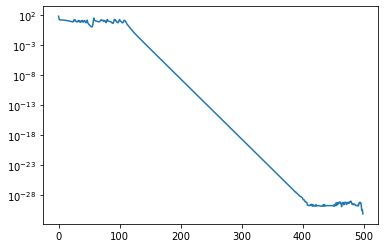

In [21]:
plt.semilogy(training_loss);

In [22]:
y,s,z = forward_pass(input_value, verbose=False)
print(z[-1])
print(output_value)

[[12.3]
 [ 3.4]
 [ 5.1]]
[[12.3]
 [ 3.4]
 [ 5.1]]


Ok. It seems to work, we've learned a network that can memorize the three point-wise mappings:
$$\begin{array}{ccc} 
(1,2) & \rightarrow & 12.3\\
(3,1) & \rightarrow & 3.4 \\
(2,5) & \rightarrow & 5.1
\end{array}$$

That's a good start. Let's try to generalize this to any number of points. <br>
Let's re-initialize and check the learning on the noise-less function $x_0,x_1\mapsto \sqrt{x_0+x_1}$.<br>
This time we shall visualize both the training and testing error.

In [23]:
sizes = [2,4,3,1]
biases = [np.random.randn(1,y) for y in sizes[1:]]
weights = [np.random.randn(out,inp) for inp,out in zip(sizes[:-1],sizes[1:])]

In [24]:
# generate training and testing sets
def func(x):
    return np.sqrt(x[:,0]+x[:,1])

testing_x  = np.random.uniform(size=(100,2))
testing_y  = func(testing_x).reshape(-1,1)
training_x = np.random.uniform(size=(100,2))
training_y = func(training_x).reshape(-1,1)

# compute initial generalization loss
y,s,z = forward_pass(testing_x, verbose=False)
err = np.mean((z[-1]-testing_y)**2)
print("Generalization loss estimate:",err)

Generalization loss estimate: 1.5482562474970636


In [25]:
nsteps = 1000
training_loss = np.zeros(nsteps)
testing_loss  = np.zeros(nsteps)

for i in range(nsteps):
    _,_,z_test = forward_pass(testing_x, verbose=False)
    testing_loss[i]  = np.mean((z_test[-1]-testing_y)**2)
    y_train,s_train,z_train = forward_pass(training_x, verbose=False)
    training_loss[i] = np.mean((z_train[-1]-training_y)**2)
    backward_pass(training_y, y_train, s_train, z_train, 0.001)

last training loss: 0.043625316144689695
last generalization loss: 0.04382908506472722


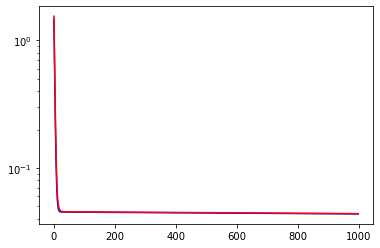

In [26]:
plt.semilogy(training_loss, c='b')
plt.semilogy(testing_loss, c='r')
print("last training loss:", training_loss[-1])
print("last generalization loss:", testing_loss[-1])

Let's try some random values.

In [27]:
x = np.random.uniform(size=(10,2))
ztrue = func(x).reshape(-1,1)
print(ztrue)
_,_,zpred = forward_pass(x)
print(zpred[-1])
print(ztrue-zpred[-1])

[[0.54860834]
 [1.27215399]
 [1.21658801]
 [0.51163423]
 [1.06668344]
 [0.94400253]
 [0.68399251]
 [1.29101013]
 [1.04271466]
 [1.15325351]]
[[0.95452482]
 [0.97938713]
 [0.97627493]
 [0.95290833]
 [0.97303367]
 [0.96614282]
 [0.96210319]
 [0.97804282]
 [0.9579439 ]
 [0.9736603 ]]
[[-0.40591648]
 [ 0.29276686]
 [ 0.24031308]
 [-0.44127411]
 [ 0.09364977]
 [-0.02214029]
 [-0.27811068]
 [ 0.3129673 ]
 [ 0.08477076]
 [ 0.17959321]]


**Obervations.**<br>
It's not so impressive. Sometimes the weight optimization even diverges. But (in theory) we (should) have found the best possible fit for the neural network's weights since what we did was (attempt to) minimize the loss function. So why is it so bad?

A few possible answers at this stage:
- The $x_0,x_1\mapsto \sqrt{x_0+x_1}$ function just cannot be satisfyingly represented with this neural network architecture.
- The stochastic gradient descent procedure got stuck in a local minimum of the loss function.
- When divergence occured, the (constant) learning rate was not small enough to keep the gradient steps small.

What's your opinion on these phenomena and their possible solutions?

**Note.**<br>
You can find this code wrapped-up as a Python class in `ann.py`

# 5.7 MLP in scikit-learn

Let's train our first neural network with scikit-learn.

nb points: 1000


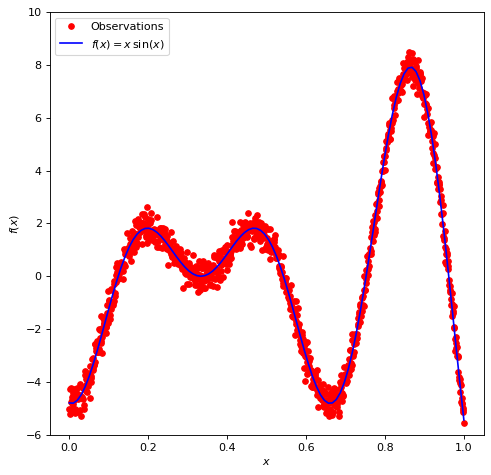

In [32]:
def func(x):
    x = 15.*x-5.
    return x*np.sin(x)

sigma_noise = 0.3
def observation(x):
    return func(x) + np.random.normal(0,sigma_noise,x.shape[0])

X = np.linspace(0,1,1000)
N = X.shape[0]
Y = observation(X)
x = np.linspace(0,1,100)

fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(X, Y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, func(x), 'b', label=u'$f(x) = x\,\sin(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-6, 10)
plt.legend(loc='upper left');

print("nb points:", N)

X=X.reshape(-1,1)

In [36]:
from sklearn.neural_network import MLPRegressor

myNN = MLPRegressor(hidden_layer_sizes=(100,10), activation='tanh', solver='lbfgs', max_iter=5000, learning_rate_init=0.1) 

In [37]:
myNN.fit(X,Y)

MLPRegressor(activation='logistic', hidden_layer_sizes=(100, 10),
             learning_rate_init=0.1, max_iter=5000, solver='lbfgs')

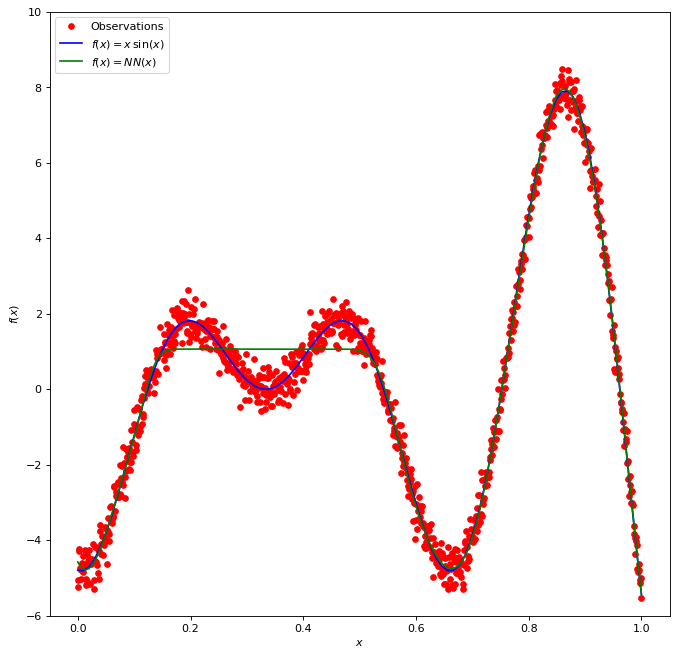

In [38]:
ypredict = myNN.predict(X)

fig=plt.figure(figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(X.ravel(), Y.ravel(), 'r.', markersize=10, label=u'Observations')
plt.plot(x, func(x), 'b', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, ypredict, 'g', label=u'$f(x) = NN(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-6, 10)
plt.legend(loc='upper left');

A bit unconvincing. We are going to focus on the classification case and will use the PyTorch API in the next part of this class, but this first example contains many warnings. Although appealing for their many good properties (trainable online, scalable to large datasets and dimensions, versatile), neural networks can be hard to tune and are prone to overfitting (or underfitting) if nothing is done to prevent it. Also, the current scikit-learn implementation is maybe not the most adapted tool for neural networks.

# 6. <a id="sec6"></a>Neural networks for classification

The derivation we have written above can be repeated for other loss functions. In particular, for classification tasks, if one has $K$ classes with $p_k$ the target classes probabilities for input $x$, the cross-entropy loss fonction is commonly used in classification:
$$L(\theta) = \sum_{k=1}^K p_k \log f_\theta(x)$$

Scikit-learn offers an easy API for classification as illustrated below, but its flexibility remains limited and PyTorch offers a great API that we shall use in the next part of this class.

In [39]:
from sys import path
path.append('.')
import load_spam
spam_data = load_spam.spam_data_loader()
spam_data.load_data()

Xtrain, ytrain, Xtest, ytest = spam_data.split(2000)

In [40]:
Xtest[0]

<1x14279 sparse matrix of type '<class 'numpy.float64'>'
	with 49 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.neural_network import MLPClassifier

myNN = MLPClassifier(hidden_layer_sizes=(25))
myNN.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=25)

In [42]:
myNN.score(Xtest,ytest)

0.9966405375139977

The classification accuracy is already excellent.